## Correlation: &thinsp; DOC and vertical pressure velocity (wap)

In [8]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import skimage.measure as skm
import seaborn as sns
import scipy
from scipy import stats

import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

import os
import sys
home = os.path.expanduser("~") + '/Documents'
sys.path.insert(0, '{}/code/phd/functions'.format(home))
from myFuncs import *

plt.rcParams['figure.figsize'] = [10, 7.5]

### one dataset

In [30]:
variable = 'wap500'

org_options = [
    'rome',
    # 'ni'
    ]

models_cmip5 = [
    # 'IPSL-CM5A-MR', # 1
    # 'GFDL-CM3',     # 2
    # 'GISS-E2-H',    # 3  no wap data
    # 'bcc-csm1-1',   # 4  only monthly wap (for rcp)
    # 'CNRM-CM5',     # 5
    # 'CCSM4',        # 6  only monthly wap
    # 'HadGEM2-AO',   # 7  only monthly wap
    # 'BNU-ESM',      # 8
    # 'EC-EARTH',     # 9  no wap data
    # 'FGOALS-g2',    # 10
    # 'MPI-ESM-MR',   # 11
    # 'CMCC-CM',      # 12
    # 'inmcm4',       # 13 only monthly wap
    # 'NorESM1-M',    # 14
    # 'CanESM2',      # 15
    # 'MIROC5',       # 16
    # 'HadGEM2-CC',   # 17 no wap data
    # 'MRI-CGCM3',    # 18
    # 'CESM1-BGC'     # 19 only monthly wap
    ]

models_cmip6 = [     
    'TaiESM1',        # 1
    'BCC-CSM2-MR',    # 2
    'FGOALS-g3',      # 3
    'CNRM-CM6-1',     # 4
    'MIROC6',         # 5
    'MPI-ESM1-2-HR',  # 6
    'NorESM2-MM',     # 7
    'GFDL-CM4',       # 8
    'CanESM5',        # 9
    'CMCC-ESM2',      # 10
    'UKESM1-0-LL',    # 11
    'MRI-ESM2-0',     # 12
    # 'CESM2',          # 13
    'NESM3'           # 14
    ]
datasets = models_cmip5 + models_cmip6

resolutions = [
    # 'original',
    'regridded'
    ]

experiments = [
    'historical',
    # 'rcp85', 
    # 'ssp585'
    ]

print('variable:{}, dataset:{}, experiment:{}, resolution:{}'.format(variable, datasets[0], experiments[0], resolutions[0]))
ds = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])
ds

variable:wap500, dataset:TaiESM1, experiment:historical, resolution:regridded


<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 128)
Coordinates:
  * time     (time) object 1970-01-16 12:00:00 ... 1999-12-16 12:00:00
    plev     float64 ...
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Data variables:
    wap500   (time, lat, lon) float32 ...
Attributes: (12/50)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 0671-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     171550.0
    ...                        ...
    title:                     TaiESM1 output prepared for CMIP6
    variable_id:               wap
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/e871c66d-4f95-4535-88fe-a6071843749a

In [10]:
data = ds[variable]
data

<xarray.DataArray 'wap500' (time: 360, lat: 22, lon: 128)>
[1013760 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1970-01-16T12:00:00 ... 1999-12-16T12:00:00
    plev     float64 5e+04
  * lat      (lat) float64 -29.3 -26.51 -23.72 -20.93 ... 20.93 23.72 26.51 29.3
  * lon      (lon) float64 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    regrid_method:  conservative
    units:          hPa day⁻¹

In [11]:
org = get_metric(org_options[0], datasets[0], experiments[0], resolution=resolutions[0])[org_options[0]]
org

<xarray.DataArray 'rome' (time: 10957)>
array([751057.679437, 870469.524855, 931802.527406, ..., 799993.242017,
       725665.948279, 672974.665847])
Coordinates:
  * time     (time) datetime64[ns] 1970-01-01T12:00:00 ... 1999-12-31T12:00:00
Attributes:
    units:    km²

In [12]:
def pick_region(data, region = 'descent'):
    if region == 'total':
        pass
    if region == 'descent':
        data = data.where(data>0)
    elif region == 'ascent':
        data = data.where(data<0)
    return data

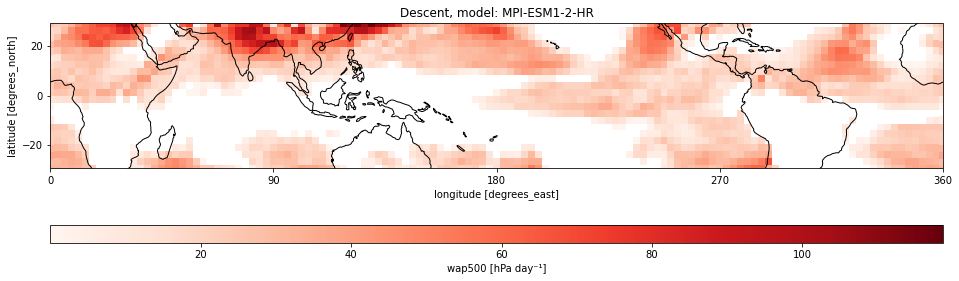

In [21]:
data_options = [
    # 'total',
    # 'ascent',
    'descent'
    ]

data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
scene = pick_region(data, data_options[0]).isel(time=0)

if data_options[0] == 'total':
    cmap = 'RdBu_r'
    title = 'vertical pressure velocity (ascent in blue), model: {}'.format(datasets[0])
    vmin = -np.max(scene)
    vmax = np.max(scene)

if data_options[0] == 'ascent':
    cmap = 'Blues_r'
    title = 'ascent, model: {}'.format(datasets[0])

if data_options[0] == 'descent':
    cmap = 'Reds'
    title = 'Descent, model: {}'.format(datasets[0])

plot_scene(scene, cmap = cmap, title = title)

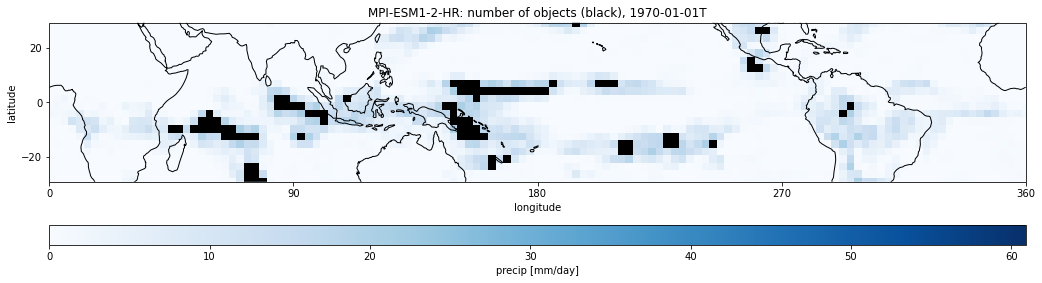

In [18]:
scene = get_dsvariable('precip', datasets[0],experiments[0],home, resolutions[0], timescale = 'daily')['precip'].isel(time=0)
conv_threshold = get_metric('prPercentiles', datasets[0], experiments[0])['pr97'].mean(dim=('time'))

lat = scene.lat
lon = scene.lon
lonm,latm = np.meshgrid(lon,lat)

obj = skm.label(scene.where(scene>=conv_threshold,0)>0, background=np.nan,connectivity=2)
obj = (obj>0)*1
labelMatrix = xr.DataArray(
    data=obj,
    dims=['lat', 'lon'],
    coords={'lat': scene.lat.data, 'lon': scene.lon.data}
    )
obj = labelMatrix.where(labelMatrix>0)


fig= plt.figure(figsize=(17.5,8))
ax = fig.add_subplot(projection=cartopy.crs.PlateCarree(central_longitude=180))

ax.add_feature(cartopy.feature.COASTLINE)
ax.set_extent([lon[0], lon[-1], lat[0], lat[-1]], crs=cartopy.crs.PlateCarree())

pcm = ax.pcolormesh(lonm,latm, scene,transform=cartopy.crs.PlateCarree(),zorder=0, cmap='Blues') #, vmin=10, vmax=50)
ax.pcolormesh(lonm,latm, obj,transform=cartopy.crs.PlateCarree(), cmap='Greys_r')

ax.set_title(datasets[0] + ': number of objects (black), ' + str(scene.coords['time'].values)[:11] )
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')

ax.set_yticks([-20, 0, 20])
ax.set_xticks([-180, -90, 0, 90, 180])
ax.set_xticklabels([0, 90, 180, 270, 360])

plt.colorbar(pcm, ax=ax, orientation='horizontal',pad=0.10, aspect=50, fraction=0.055, label = 'precip' + ' [mm/day]')
plt.show()

#### values

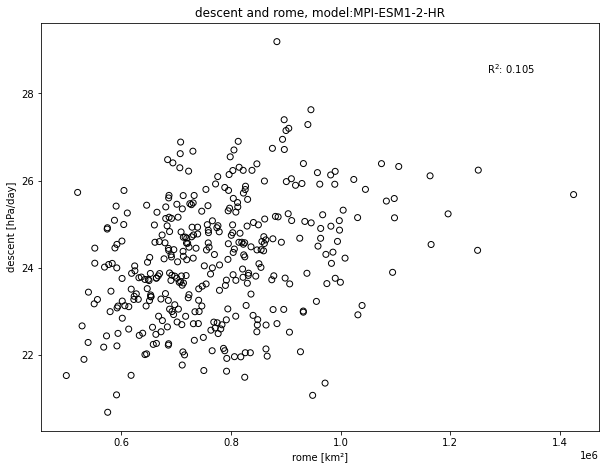

In [22]:
timeMean_options = [
    # 'annual',
    'monthly',
    # 'daily'
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
data = pick_region(data, data_options[0])
y = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
y = y.assign_coords(time=x.time)

# mix_of_daily_monthly = False 
# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         data = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         y = data.weighted(aWeights).mean(dim=('lat','lon')) 
#         y = y.assign_coords(time=x.time)
    
fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax)
plt.title('{} and {}, model:{}'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
plt.show()

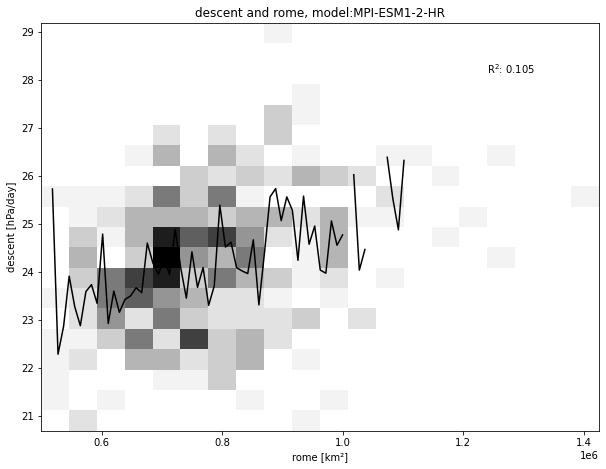

In [23]:
timeMean_options = [
    # 'annual',
    'monthly',
    # 'daily'
    ]

x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
y = y.assign_coords(time=x.time)

# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         data = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         y = data.weighted(aWeights).mean(dim=('lat','lon')) 
#         y = y.assign_coords(time=x.time)

fig = plt.figure()
ax= fig.add_subplot()

plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
plot_bins(x,y, ax)

plt.title('{} and {}, model:{}'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
plt.show()

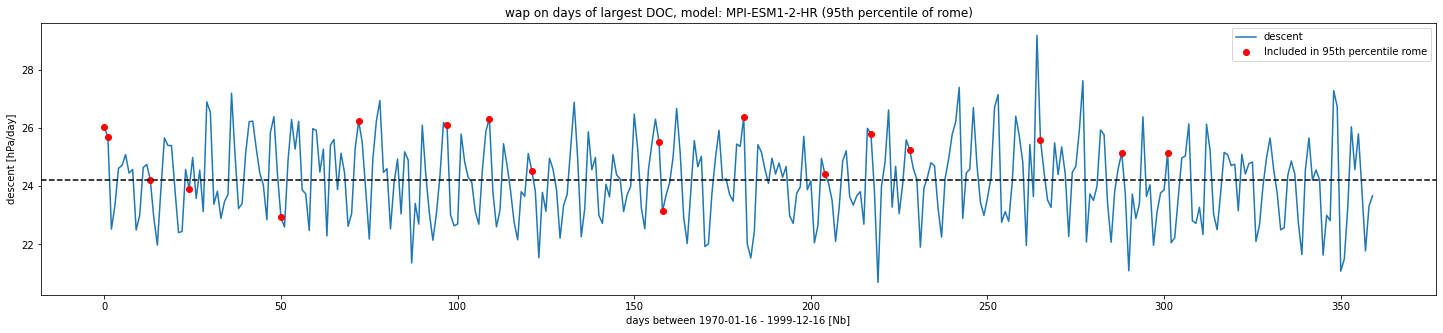

In [24]:
timeMean_options = [
    # 'annual',
    'monthly',
    # 'daily'
    ]

x_threshold = 95


x = resample_timeMean(org, timeMean_options[0])
aWeights = np.cos(np.deg2rad(data.lat))
y = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
y = y.assign_coords(time=x.time)


# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         data = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         y = data.weighted(aWeights).mean(dim=('lat','lon')) 
#         y = y.assign_coords(time=x.time)


x_prctile = np.percentile(x, x_threshold)
x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

x_data= np.arange(0,len(y))

f, ax = plt.subplots(figsize = (25,5))
title = 'wap on days of largest DOC, model: {} ({}th percentile of {})'.format(datasets[0], str(x_threshold), org_options[0])
label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

ax.plot(x_data,y, zorder=0,label=data_options[0])
ax.scatter(x_org, y[x_org], label=label, color='r')
ax.axhline(y=np.mean(y), color='k', linestyle = '--')
ax.set_title(title)


ax.set_xlabel('days between ' + str(data.coords['time'][0].values)[:10] 
              +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
ax.legend()

#### anomalies

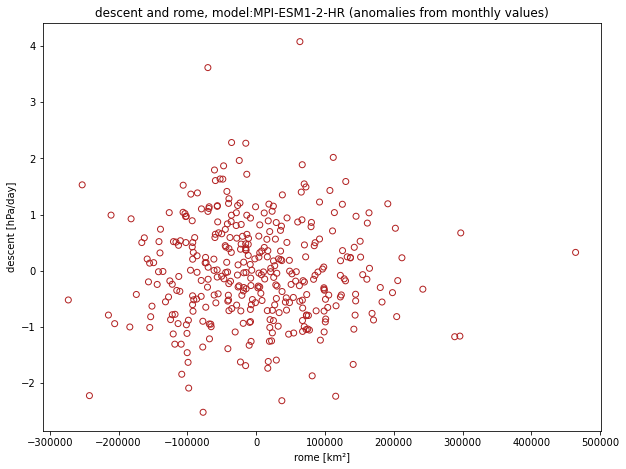

In [25]:
timeMean_options = [
    'monthly'
    ]

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         f = data.weighted(aWeights).mean(dim=('lat','lon')) 

climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 

fig = plt.figure()
ax= fig.add_subplot()
plot_scatter(x, y, ax, 'firebrick')
plt.title('{} and {}, model:{} (anomalies from monthly values)'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
plt.show()

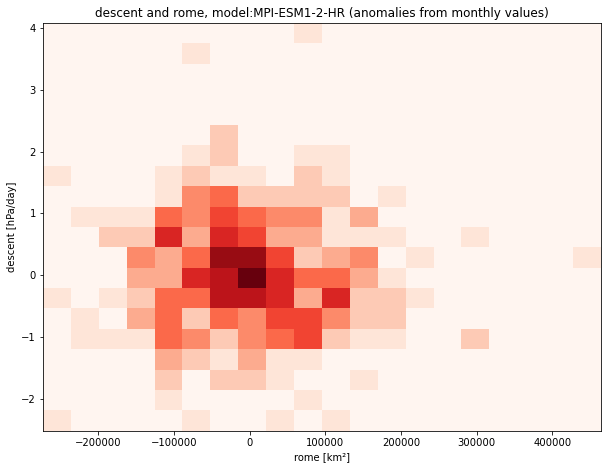

In [26]:
timeMean_options = [
    'monthly',
    ]

f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         f = data.weighted(aWeights).mean(dim=('lat','lon')) 

climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 


fig = plt.figure()
ax= fig.add_subplot()

plt.hist2d(x,y,[20,20], cmap = 'Reds') #, vmin=0, vmax=300)
plot_bins(x,y, ax, 'r')

plt.title('{} and {}, model:{} (anomalies from monthly values)'.format(data_options[0], org_options[0], datasets[0]))
plt.xlabel('{} [{}]'.format(org_options[0], org.units))
plt.ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
plt.show()

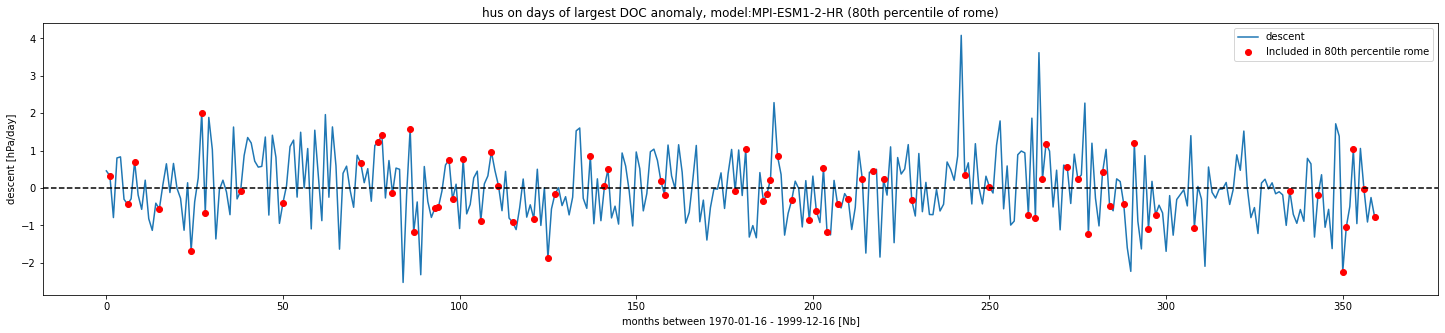

In [28]:
timeMean_options = [
    'monthly',
    ]

x_threshold = 80


f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

# if mix_of_daily_monthly and len(data) >1000: 
#         data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
#         f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
#         if data_options[0] == 'ascent':
#             data = data.where(data<0)
#         if data_options[0] == 'descent':
#             data = data.where(data>0)
#         f = data.weighted(aWeights).mean(dim=('lat','lon')) 

climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 


x_prctile = np.percentile(x, x_threshold)
x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

x_data= np.arange(0,len(y))

f, ax = plt.subplots(figsize = (25,5))
title = 'hus on days of largest DOC anomaly, model:{} ({}th percentile of {})'.format(datasets[0], str(x_threshold), org_options[0])
label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

ax.plot(x_data,y, zorder=0,label=data_options[0])
ax.scatter(x_org, y[x_org], label=label, color='r')
ax.axhline(y=np.mean(y), color='k', linestyle = '--')
ax.set_title(title)


ax.set_xlabel('months between ' + str(data.coords['time'][0].values)[:10] 
              +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]')
ax.set_ylabel('{} [{}]'.format(data_options[0], 'hPa/day'))
ax.legend()

### comparing datasets (values)

In [ ]:
data_options = [
    # 'total',
    # 'ascent',
    'descent'
    ]

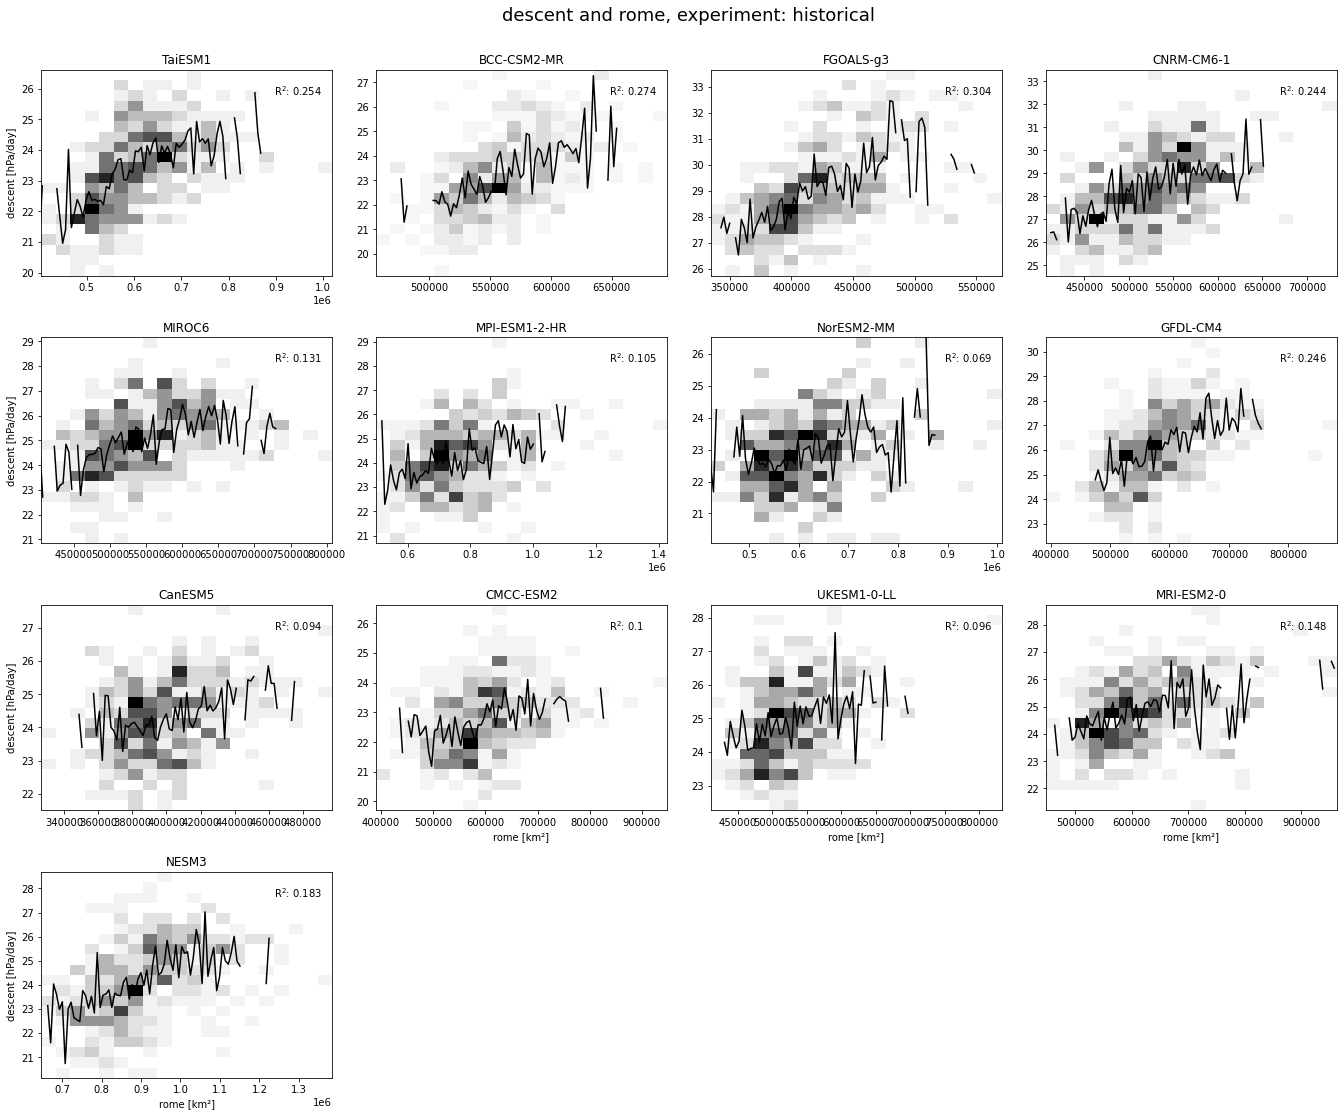

In [31]:
timeMean_options = [
    # 'annual',
    'monthly',
    # 'daily'
    ]

quantile_low = 0
quantile_high = 1
absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:
        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        x = resample_timeMean(org, timeMean_options[0])

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
        data = pick_region(data, data_options[0])
        aWeights = np.cos(np.deg2rad(data.lat))
        y = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
        y = y.assign_coords(time=x.time)

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {}'.format(data_options[0], org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)
for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(4,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    x = resample_timeMean(org, timeMean_options[0])


    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
    data = pick_region(data, data_options[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    y = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
    y = y.assign_coords(time=x.time)


    # plot_scatter(x, y , ax)

    plt.hist2d(x,y,[20,20], cmap ='Greys') #, vmin=0, vmax=300)
    plot_bins(x,y, ax)

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options[0], org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], 'hPa/day')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

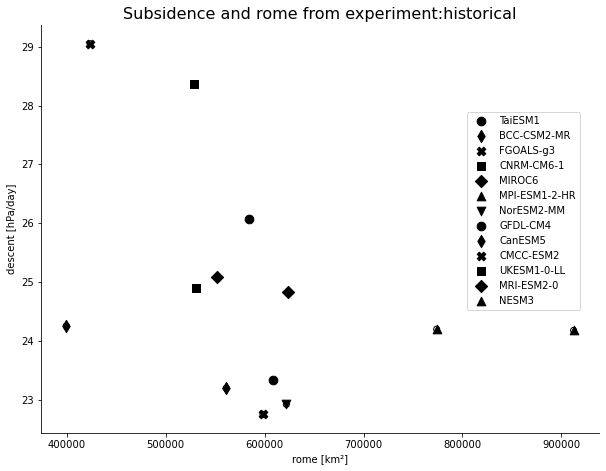

In [38]:
order, colors = orderByTas(False, datasets, experiments[0], resolutions[0])

x= []
y= []
for dataset in datasets:
    org = get_metric(org_options[0], dataset, experiments[0], home, resolutions[0])[org_options[0]]
    x_data = org.mean(dim=('time'))
    x = np.append(x, x_data)

    data = get_dsvariable(variable, dataset, experiments[0], home, resolutions[0])[variable]
    data = pick_region(data, data_options[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    y_data = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')
    y = np.append(y, y_data)

fig, ax = plt.subplots()
title = '{} and {} from experiment:{}'.format('Subsidence', org_options[0], experiments[0])
xlabel = '{} [{}]'.format(org_options[0], org.units)
ylabel = '{} [{}]'.format(data_options[0], 'hPa/day')

plot_scatter(x,y,ax)

labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.975,0.8))

sns.despine(top=True, right=True, left=False)
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### with warming

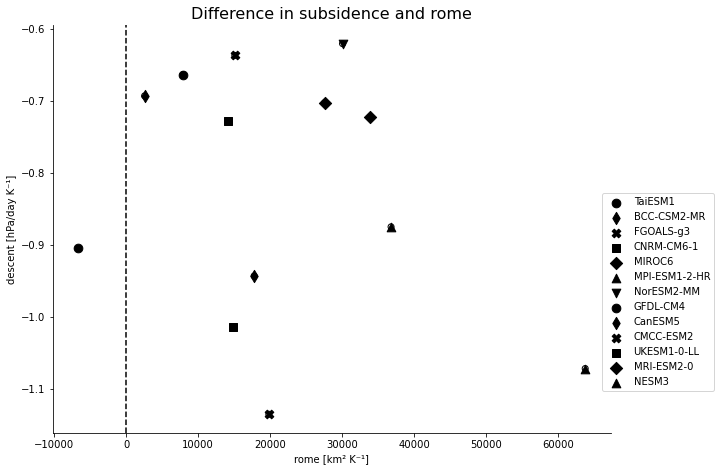

In [37]:
order, colors = orderByTasdiff(False, datasets, models_cmip5, resolutions[0])

x= []
y= []
for dataset in datasets:
    x_historical = get_metric(org_options[0], dataset, experiment = 'historical', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    x_rcp = get_metric(org_options[0], dataset, experiment = 'ssp585', resolution=resolutions[0])[org_options[0]].mean(dim=('time'))
    xdiff = x_rcp - x_historical

    fractional_change = False
    if fractional_change:
        xdiff = (xdiff/x_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        xdiff = xdiff/tasdiff


    data = get_dsvariable(variable, dataset, experiment = 'historical', resolution = resolutions[0])[variable]
    data = pick_region(data, data_options[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    data_historical = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')

    data = get_dsvariable(variable, dataset, experiment = 'ssp585', resolution = resolutions[0])[variable]
    data = pick_region(data, data_options[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    data_rcp = data.weighted(aWeights).mean(dim=('lat','lon')).mean(dim='time')

    datadiff = data_rcp - data_historical

    fractional_change = False
    if fractional_change:
        datadiff = (datadiff/data_historical)*100

    divide_by_tasdiff = True
    if divide_by_tasdiff:
        tas_historical = get_metric('tas_sMean', dataset, experiment='historical', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tas_rcp = get_metric('tas_sMean', dataset, experiment='ssp585', resolution=resolutions[0])['tas_sMean'].mean(dim='time')
        tasdiff = tas_rcp - tas_historical
        datadiff = datadiff/tasdiff

    x = np.append(x, xdiff)
    y = np.append(y, datadiff)

fig, ax = plt.subplots()
title = 'Difference in {} and {}'.format('subsidence', org_options[0])
xlabel = '{} [{}]'.format(org_options[0], org.units + ' K' + chr(0x207B) + chr(0x00B9))
ylabel = '{} [{}]'.format(data_options[0], 'hPa/day' + ' K' + chr(0x207B) + chr(0x00B9))

plot_scatter(x,y,ax)


labels = datasets
if labels:
    datasets_order = np.array(datasets)[order]
    labels_order = datasets_order[np.isin(datasets_order, np.array(labels))].tolist()
    
    for i, label in enumerate(labels_order):
        dataset_idx= datasets.index(label)
        plt.scatter(x[dataset_idx],y[dataset_idx],c=colors[i], marker = markers[i%7], s=75,  label=label)
    
    plt.legend(bbox_to_anchor=(0.975,0.6))

sns.despine(top=True, right=True, left=False)
plt.axvline(0, color= 'k',  linestyle="--")
# plt.axhline(0, color= 'k',  linestyle="--")
plt.title(title, fontsize = 16)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()

### comparing datasets (anomalies)

In [ ]:
f = resample_timeMean(org, timeMean_options[0])
climatology = f.groupby('time.month').mean('time')
x = f.groupby('time.month') - climatology 

aWeights = np.cos(np.deg2rad(data.lat))
f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

if mix_of_daily_monthly and len(data) >1000: 
        data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
        f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
        if data_options[0] == 'ascent':
            data = data.where(data<0)
        if data_options[0] == 'descent':
            data = data.where(data>0)
        f = data.weighted(aWeights).mean(dim=('lat','lon')) 

climatology = f.groupby('time.month').mean('time')
y = f.groupby('time.month') - climatology 

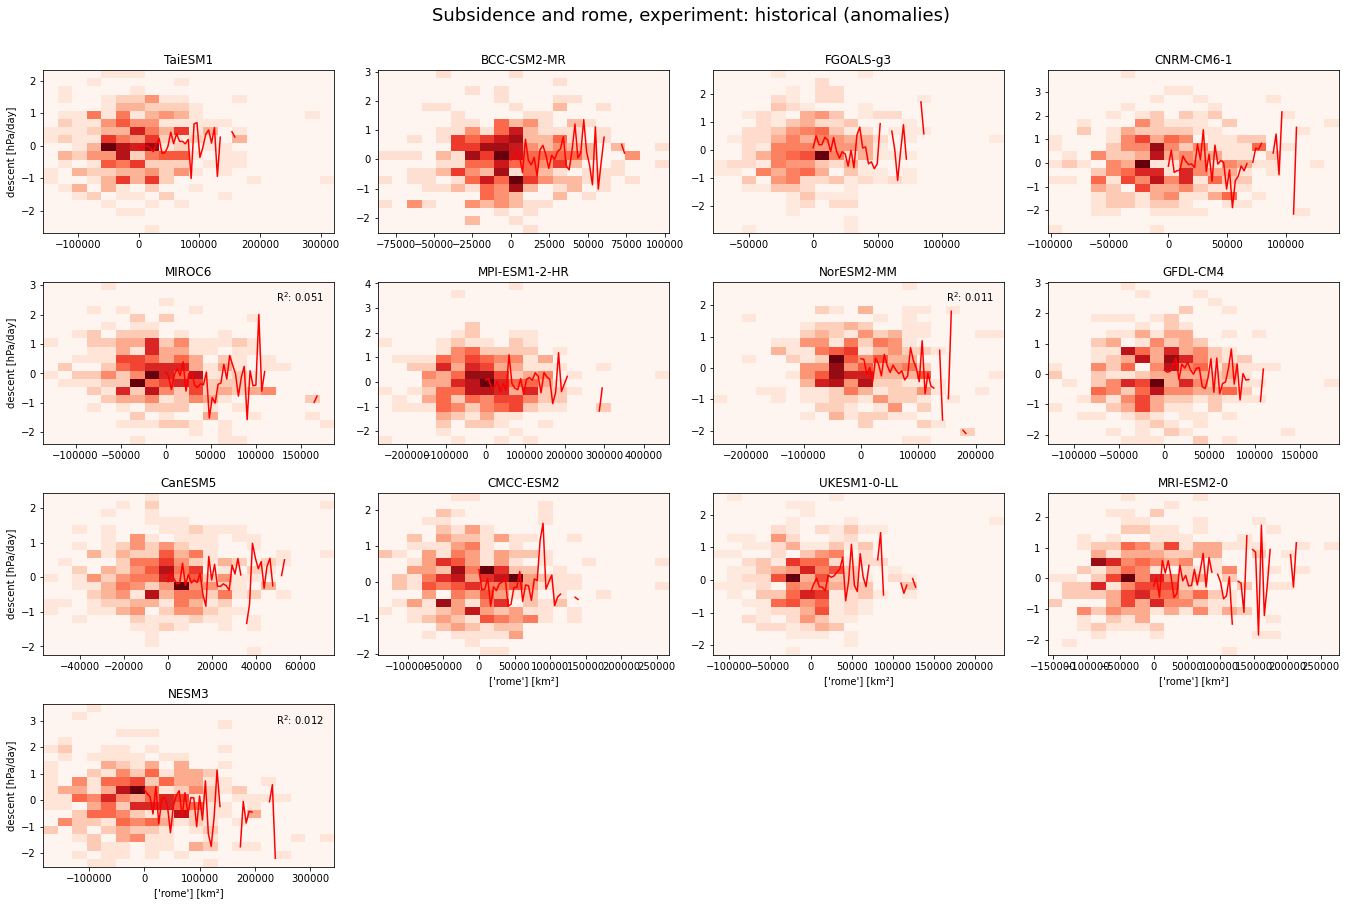

In [41]:
timeMean_options = [
    'monthly',
    ]

quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:

        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        f = resample_timeMean(org, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        x = f.groupby('time.month') - climatology 

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

        if mix_of_daily_monthly and len(data) >1000: 
                data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
                f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
                if data_options[0] == 'ascent':
                    data = data.where(data<0)
                if data_options[0] == 'descent':
                    data = data.where(data>0)
                f = data.weighted(aWeights).mean(dim=('lat','lon')) 

        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = '{} and {}, experiment: {} (anomalies)'.format('Subsidence', org_options[0], experiments[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    f = resample_timeMean(org, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    x = f.groupby('time.month') - climatology 

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    data = pick_region(data, data_options[0])
    aWeights = np.cos(np.deg2rad(data.lat))
    f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 
    y = y.assign_coords(time=x.time)

    plt.hist2d(x,y,[20,20], cmap = 'Reds') #, vmin=0, vmax=300)
    plot_bins(x,y, ax, 'r')
    
    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = '{} [{}]'.format(org_options, org.units)
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], 'hPa/day')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)

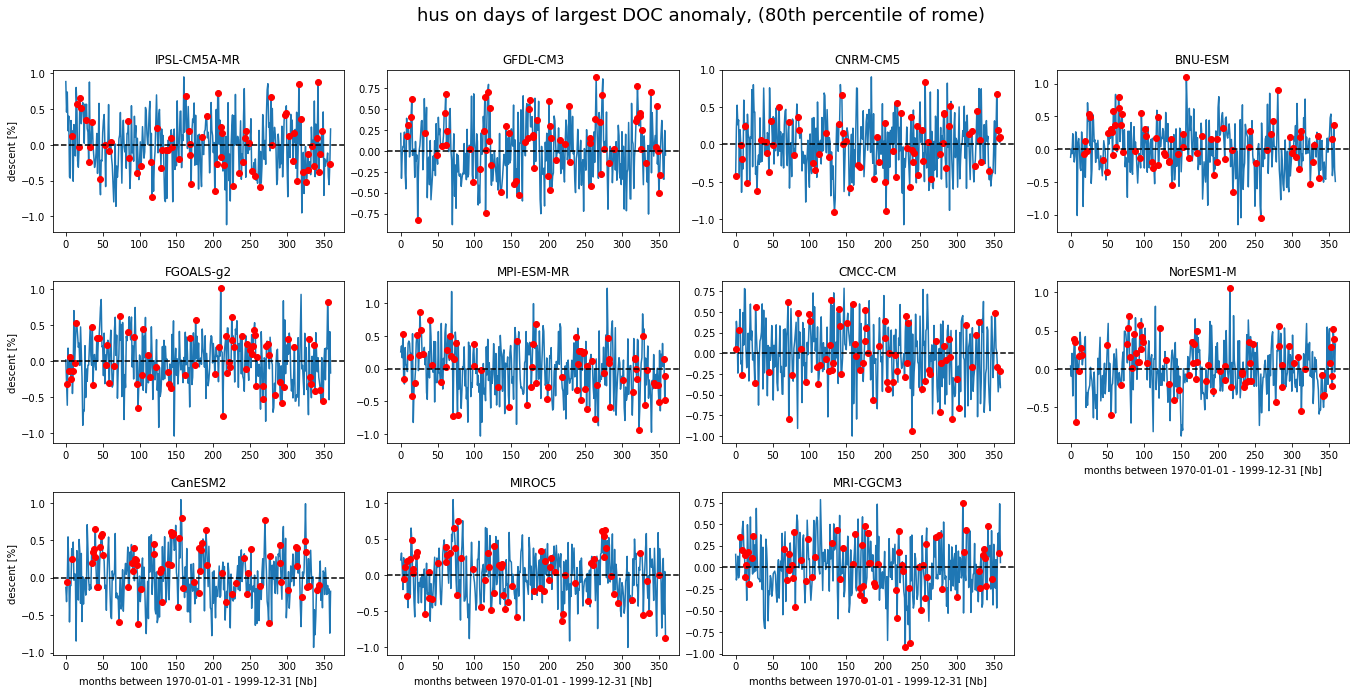

In [ ]:
timeMean_options = [
    'monthly',
    ]


x_threshold = 80



quantile_low = 0
quantile_high = 1

absolute_xlimits = False
if absolute_xlimits:
    xmin, xmax = [], []
    for dataset in datasets:
        org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
        f = resample_timeMean(org, timeMean_options[0])
        climatology = f.groupby('time.month').mean('time')
        x = f.groupby('time.month') - climatology 

        xmin = np.append(xmin, np.quantile(x, quantile_low))
        xmax = np.append(xmax, np.quantile(x, quantile_high))
    xmin = np.min(xmin)
    xmax = np.max(xmax)
else:
    xmin, xmax = None, None 


absolute_ylimits = False
if absolute_ylimits:
    ymin, ymax = [], []
    for dataset in datasets:
        data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
        aWeights = np.cos(np.deg2rad(data.lat))
        f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

        if mix_of_daily_monthly and len(data) >1000: 
                data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
                f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
                if data_options[0] == 'ascent':
                    data = data.where(data<0)
                if data_options[0] == 'descent':
                    data = data.where(data>0)
                f = data.weighted(aWeights).mean(dim=('lat','lon')) 

        climatology = f.groupby('time.month').mean('time')
        y = f.groupby('time.month') - climatology 

        ymin = np.append(ymin, np.quantile(y, quantile_low))
        ymax = np.append(ymax, np.quantile(y, quantile_high))
    ymin = np.min(ymin)
    ymax = np.max(ymax)
else:
    ymin, ymax = None, None 


fig= plt.figure(figsize=(22.5,17.5))
title = 'hus on days of largest DOC anomaly, ({}th percentile of {})'.format(str(x_threshold), org_options[0])

fig.suptitle(title, fontsize=18, y=0.95)

for i, dataset in enumerate(datasets):
    ax= fig.add_subplot(5,4,i+1)
    title = dataset

    org = get_metric(org_options[0], dataset, experiments[0], resolution=resolutions[0])[org_options[0]]
    f = resample_timeMean(org, timeMean_options[0])
    climatology = f.groupby('time.month').mean('time')
    x = f.groupby('time.month') - climatology 

    data = get_dsvariable(variable, dataset, experiments[0], resolution=resolutions[0])[variable]
    aWeights = np.cos(np.deg2rad(data.lat))
    f = resample_timeMean(data.weighted(aWeights).mean(dim=('lat','lon')) , timeMean_options[0])

    if mix_of_daily_monthly and len(data) >1000: 
            data = get_dsvariable(variable, datasets[0], experiments[0], home, resolutions[0])[variable]
            f = resample_timeMean(data, timeMean_options[0]) # matters as gridpoints with daily value can be excluded if taking the monthyl gridbox mean first
            if data_options[0] == 'ascent':
                data = data.where(data<0)
            if data_options[0] == 'descent':
                data = data.where(data>0)
            f = data.weighted(aWeights).mean(dim=('lat','lon')) 

    climatology = f.groupby('time.month').mean('time')
    y = f.groupby('time.month') - climatology 


    x_prctile = np.percentile(x, x_threshold)
    x_org= np.squeeze(np.argwhere(x.data>=x_prctile)) # positive anomalies are where DOC exceed the monthly mean

    x_data= np.arange(0,len(y))

    label = 'Included in {}th percentile {}'.format(str(x_threshold), org_options[0])

    ax.plot(x_data,y, zorder=0,label=data_options[0])
    ax.scatter(x_org, y[x_org], label=label, color='r')
    ax.axhline(y=np.mean(y), color='k', linestyle = '--')

    plt.title(dataset)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)

    if (len(datasets)-i)<=4:
        xlabel = 'months between ' + str(data.coords['time'][0].values)[:10] +' - '+ str(data.coords['time'][-1].values)[:10] + ' [Nb]'
        plt.xlabel(xlabel)

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        ylabel = '{} [{}]'.format(data_options[0], '%')
        plt.ylabel(ylabel)

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)